## 4. Reconocimiento de Imágenes Sign Gestures


In [39]:
#Imports:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.tree import DecisionTreeClassifier as Tree

(a) Construya una función que cargue todos los datos de entrenamiento y pruebas del problema generando
como salida: (i) dos matrices Xtr, Ytr, correspondientes a las imágenes y etiquetas de entrenamiento,
(ii) dos matrices Xt, Yt, correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos
matrices Xv, Yv, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es
decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraído desde
el conjunto de entrenamiento original y no debe superar las 7000 imágenes.

In [40]:
def load_data():
    train = pd.read_csv('./dataset4/sign_mnist_train.csv')
    test = pd.read_csv('./dataset4/sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    X_train, X_val, y_train, y_val = train_test_split(x_tr, y_tr,test_size=0.25, random_state=42)
    return(X_train,X_val,x_t,y_train,y_val,y_t)

def plot_image(x,y):           
    f, axarr = plt.subplots(24, 10,figsize=(16,32))
    for i in range(9):
        index = []
        for w in range(len(y.as_matrix())):
            if(y.as_matrix()[w] == i):
                index.append(w)
        for w in range(10):
            axarr[i,w].imshow(x_t.as_matrix()[index[w]].reshape(28, 28), cmap="gray")
            axarr[i,w].axis('off')
    for i in range(9,24):
        index = []
        for w in range(len(y.as_matrix())):
            if(y.as_matrix()[w] == i+1):
                index.append(w)
        for w in range(10):
            axarr[i,w].imshow(x_t.as_matrix()[index[w]].reshape(28, 28), cmap="gray")
            axarr[i,w].axis('off')
    plt.show()

In [41]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

In [42]:
print('%s%d' %("El tamaño del conjunto x_v es: ", x_v.shape[0]))
print('%s%d' %("El tamaño del conjunto y_v es: ", y_v.shape[0]))

El tamaño del conjunto x_v es: 6864
El tamaño del conjunto y_v es: 6864


# Comentario:

Como se puede apreciar en la función load_data, se realizo una simple técnica de hold_out para separar el conjunto de prueba origina en el conjunto de validación y el conjunto de prueba final, siendo este ultimo el que se utilizara para entrenar las futuras maquinas.

Además, se creo la función "plot_image" para genera una visualización de que es lo que la maquina esta recibiendo (se realizo con el conjunto de prueba por que era mas fácil identificar la etiqueta y organizar cada imagen.) la cual se puede ver a continuación.

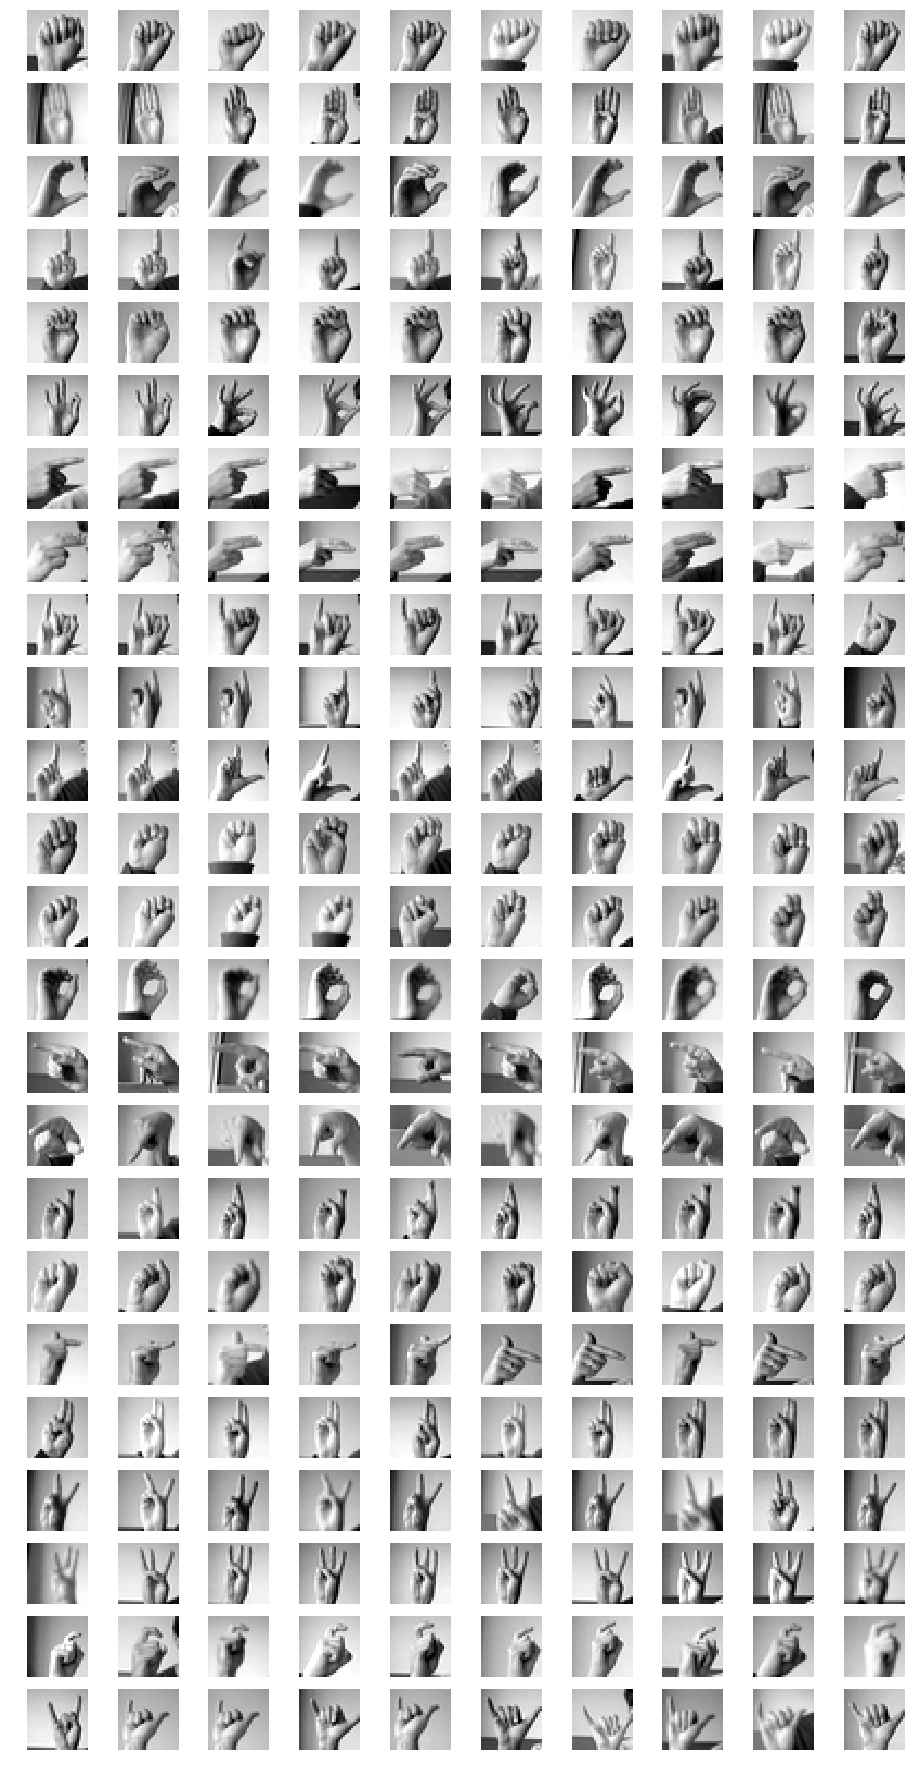

In [43]:
plot_image(x_t,y_t)

(b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo
escalando los datos de acuerdo a la intensidad máxima de pixel (i.e., dividiendo por 255) y luego
centrando y escalándolos como en actividades anteriores.

# Pre-procesamiento 1

In [44]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))


/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 38us/step - loss: 3.2111 - acc: 0.0464 - val_loss: 3.2038 - val_acc: 0.0485
Epoch 2/100
20591/20591 [==============================] - 0s 19us/step - loss: 3.1953 - acc: 0.0468 - val_loss: 3.1849 - val_acc: 0.0485
Epoch 3/100
20591/20591 [==============================] - 0s 19us/step - loss: 3.1779 - acc: 0.0479 - val_loss: 3.1712 - val_acc: 0.0705
Epoch 4/100
20591/20591 [==============================] - 0s 19us/step - loss: 3.1637 - acc: 0.0569 - val_loss: 3.1480 - val_acc: 0.0868
Epoch 5/100
20591/20591 [==============================] - 0s 19us/step - loss: 3.0881 - acc: 0.1133 - val_loss: 2.9459 - val_acc: 0.1212
Epoch 6/100
20591/20591 [==============================] - 0s 19us/step - loss: 2.7461 - acc: 0.1540 - val_loss: 2.5916 - val_acc: 0.1546
Epoch 7/100
20591/20591 [==============================] - 0s 20us/step - loss: 2.5270 - acc: 0.1808 - val_loss: 3.1444 - v

20591/20591 [==============================] - 0s 18us/step - loss: 0.2187 - acc: 0.9377 - val_loss: 0.1715 - val_acc: 0.9545
Epoch 60/100
20591/20591 [==============================] - 0s 18us/step - loss: 0.3598 - acc: 0.9015 - val_loss: 0.1838 - val_acc: 0.9527
Epoch 61/100
20591/20591 [==============================] - 0s 18us/step - loss: 0.5628 - acc: 0.8707 - val_loss: 0.1961 - val_acc: 0.9524
Epoch 62/100
20591/20591 [==============================] - 0s 18us/step - loss: 0.1607 - acc: 0.9596 - val_loss: 0.1587 - val_acc: 0.9585
Epoch 63/100
20591/20591 [==============================] - 0s 18us/step - loss: 0.3636 - acc: 0.9011 - val_loss: 0.6343 - val_acc: 0.7904
Epoch 64/100
20591/20591 [==============================] - 0s 18us/step - loss: 0.3367 - acc: 0.9038 - val_loss: 0.1424 - val_acc: 0.9709
Epoch 65/100
20591/20591 [==============================] - 0s 18us/step - loss: 0.1267 - acc: 0.9724 - val_loss: 0.1162 - val_acc: 0.9790
Epoch 66/100
20591/20591 [==============

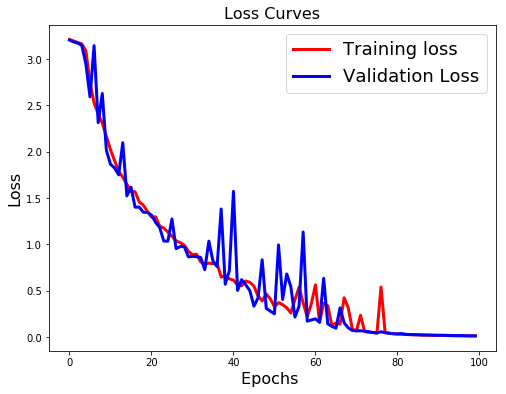

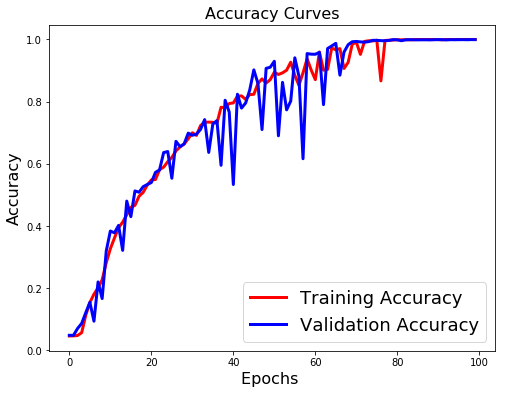

7172/7172 [==============================] - 0s 18us/step


[1.6905774979437123, 0.69994422755158947]

In [45]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 2

In [46]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 2
scaler = StandardScaler() 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 53us/step - loss: 3.1874 - acc: 0.0864 - val_loss: 3.1022 - val_acc: 0.1061
Epoch 2/100
20591/20591 [==============================] - 1s 36us/step - loss: 2.8449 - acc: 0.1490 - val_loss: 2.5258 - val_acc: 0.2200
Epoch 3/100
20591/20591 [==============================] - 1s 31us/step - loss: 2.1395 - acc: 0.3142 - val_loss: 1.8399 - val_acc: 0.3765
Epoch 4/100
20591/20591 [==============================] - 1s 32us/step - loss: 1.5755 - acc: 0.4647 - val_loss: 1.3734 - val_acc: 0.5224
Epoch 5/100
20591/20591 [==============================] - 1s 33us/step - loss: 1.1505 - acc: 0.6060 - val_loss: 0.9923 - val_acc: 0.6651
Epoch 6/100
20591/20591 [==============================] - 1s 33us/step - loss: 0.8256 - acc: 0.7244 - val_loss: 0.7246 - val_acc: 0.7640
Epoch 7/100
20591/20591 [==============================] - 1s 31us/step - loss: 0.5952 - acc: 0.8158 - val_loss: 0.5311 - v

20591/20591 [==============================] - 1s 30us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 0.9999
Epoch 60/100
20591/20591 [==============================] - 1s 30us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 61/100
20591/20591 [==============================] - 1s 30us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 62/100
20591/20591 [==============================] - 1s 30us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 63/100
20591/20591 [==============================] - 1s 33us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 64/100
20591/20591 [==============================] - 1s 32us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 65/100
20591/20591 [==============================] - 1s 33us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 66/100
20591/20591 [==============

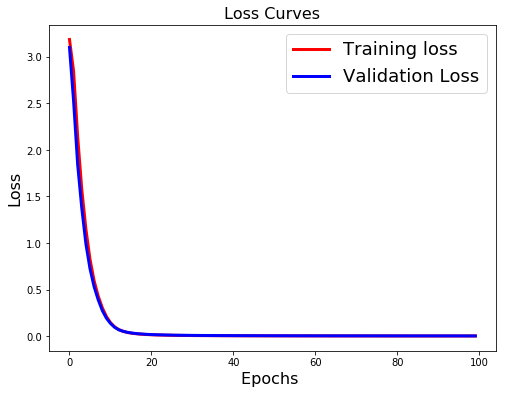

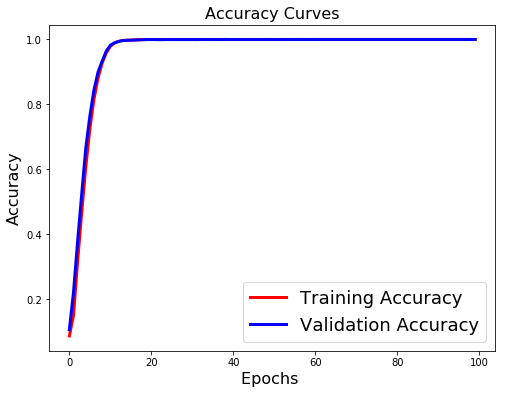

7172/7172 [==============================] - 0s 21us/step


[2.18399815071048, 0.70050195203569432]

In [47]:

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 3

In [48]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
# Pre-procesamiento 3
scaler = RobustScaler() 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 54us/step - loss: 3.2097 - acc: 0.0598 - val_loss: 3.1990 - val_acc: 0.1029
Epoch 2/100
20591/20591 [==============================] - 1s 33us/step - loss: 3.1566 - acc: 0.1047 - val_loss: 3.0888 - val_acc: 0.1100
Epoch 3/100
20591/20591 [==============================] - 1s 33us/step - loss: 2.8795 - acc: 0.1454 - val_loss: 2.6137 - val_acc: 0.2105
Epoch 4/100
20591/20591 [==============================] - 1s 32us/step - loss: 2.2370 - acc: 0.2787 - val_loss: 1.9552 - val_acc: 0.3418
Epoch 5/100
20591/20591 [==============================] - 1s 34us/step - loss: 1.7344 - acc: 0.4134 - val_loss: 1.5579 - val_acc: 0.4760
Epoch 6/100
20591/20591 [==============================] - 1s 33us/step - loss: 1.3268 - acc: 0.5570 - val_loss: 1.1756 - val_acc: 0.6196
Epoch 7/100
20591/20591 [==============================] - 1s 30us/step - loss: 0.9611 - acc: 0.6852 - val_loss: 0.8452 - v

20591/20591 [==============================] - 1s 32us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 0.9999
Epoch 60/100
20591/20591 [==============================] - 1s 30us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 0.9999
Epoch 61/100
20591/20591 [==============================] - 1s 30us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 0.9999
Epoch 62/100
20591/20591 [==============================] - 1s 32us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 0.9999
Epoch 63/100
20591/20591 [==============================] - 1s 31us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 0.9999
Epoch 64/100
20591/20591 [==============================] - 1s 30us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 0.9999
Epoch 65/100
20591/20591 [==============================] - 1s 31us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 0.9999
Epoch 66/100
20591/20591 [==============

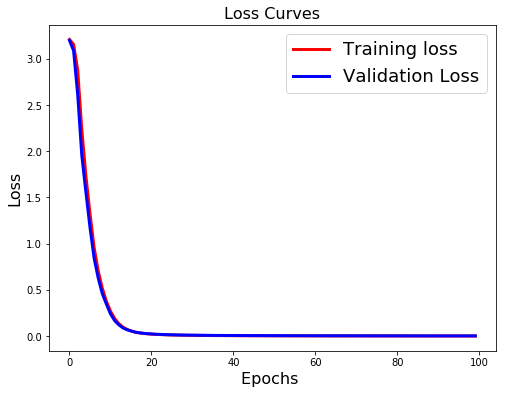

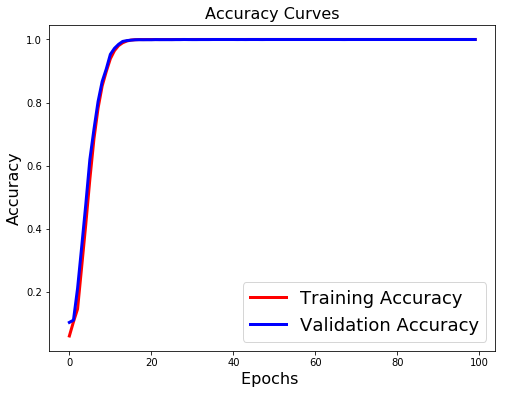

7172/7172 [==============================] - 0s 21us/step


[2.2675374777238595, 0.69046291132180704]

In [49]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 4

In [50]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
# Pre-procesamiento 4
scaler = StandardScaler()
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 41us/step - loss: 3.2068 - acc: 0.0630 - val_loss: 3.1898 - val_acc: 0.0979
Epoch 2/100
20591/20591 [==============================] - 0s 19us/step - loss: 3.0950 - acc: 0.1100 - val_loss: 2.8844 - val_acc: 0.1396
Epoch 3/100
20591/20591 [==============================] - 0s 19us/step - loss: 2.4376 - acc: 0.2235 - val_loss: 2.0205 - val_acc: 0.3310
Epoch 4/100
20591/20591 [==============================] - 0s 19us/step - loss: 1.7549 - acc: 0.3971 - val_loss: 1.5403 - val_acc: 0.4605
Epoch 5/100
20591/20591 [==============================] - 0s 19us/step - loss: 1.3089 - acc: 0.5517 - val_loss: 1.1435 - val_acc: 0.6065
Epoch 6/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.9317 - acc: 0.6937 - val_loss: 0.8087 - val_acc: 0.7284
Epoch 7/100
20591/20591 [==============================] - 0s 22us/step - loss: 0.6621 - acc: 0.7921 - val_loss: 0.5837 - v

20591/20591 [==============================] - 0s 19us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 60/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 61/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 62/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 63/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 64/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 65/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 66/100
20591/20591 [==============

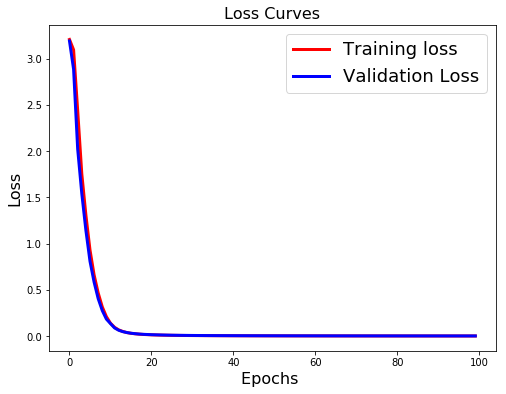

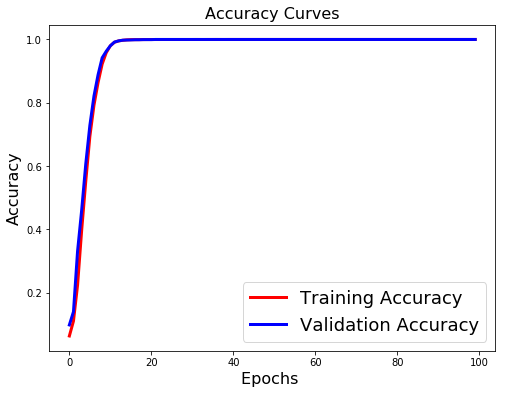

7172/7172 [==============================] - 0s 20us/step


[1.8944944046890675, 0.70635805911879535]

In [51]:

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 5

In [52]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
# Pre-procesamiento 5
scaler = RobustScaler()
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 42us/step - loss: 3.2058 - acc: 0.0776 - val_loss: 3.1820 - val_acc: 0.0849
Epoch 2/100
20591/20591 [==============================] - 0s 18us/step - loss: 3.0879 - acc: 0.1005 - val_loss: 2.9470 - val_acc: 0.1219
Epoch 3/100
20591/20591 [==============================] - 0s 18us/step - loss: 2.7263 - acc: 0.1493 - val_loss: 2.5168 - val_acc: 0.1909
Epoch 4/100
20591/20591 [==============================] - 0s 19us/step - loss: 2.2715 - acc: 0.2633 - val_loss: 1.9914 - val_acc: 0.3553
Epoch 5/100
20591/20591 [==============================] - 0s 19us/step - loss: 1.7071 - acc: 0.4315 - val_loss: 1.5028 - val_acc: 0.4838
Epoch 6/100
20591/20591 [==============================] - 0s 19us/step - loss: 1.3092 - acc: 0.5398 - val_loss: 1.1675 - val_acc: 0.6021
Epoch 7/100
20591/20591 [==============================] - 0s 19us/step - loss: 1.0105 - acc: 0.6627 - val_loss: 0.9002 - v

20591/20591 [==============================] - 0s 19us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 0.9999
Epoch 60/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 0.9999
Epoch 61/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 0.9999
Epoch 62/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 0.9999
Epoch 63/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 64/100
20591/20591 [==============================] - 0s 19us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 0.9999
Epoch 65/100
20591/20591 [==============================] - 0s 22us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 0.9999
Epoch 66/100
20591/20591 [==============

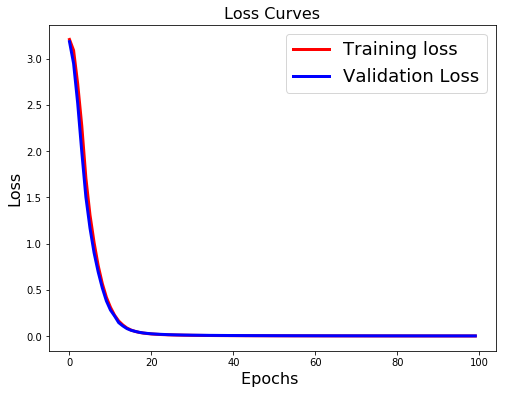

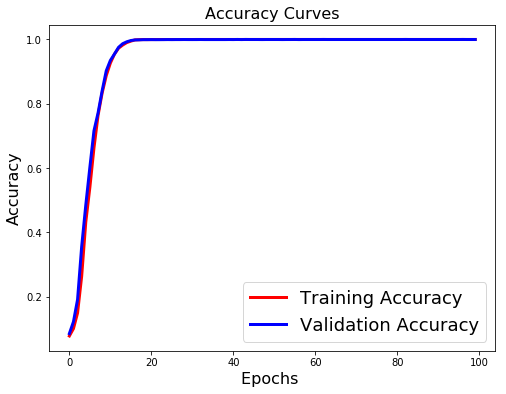

7172/7172 [==============================] - 0s 19us/step


[2.3597763547735111, 0.670803123257111]

In [53]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 6

In [54]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
# Pre-procesamiento 
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)
for i in x_tr:
    x_tr[i] = x_tr.apply(lambda x: 0 if x[i] < 0.25 else x[i],axis =1)
for i in x_tr:
    x_tr[i] = x_tr.apply(lambda x: 1 if x[i] > 0.7 else x[i],axis =1)
    
for i in x_v:
    x_v[i] = x_v.apply(lambda x: 0 if x[i] < 0.25 else x[i],axis =1)
for i in x_v:
    x_v[i] = x_v.apply(lambda x: 1 if x[i] > 0.7 else x[i],axis =1)
    
for i in x_t:
    x_t[i] = x_t.apply(lambda x: 0 if x[i] < 0.25 else x[i],axis =1)
for i in x_t:
    x_t[i] = x_t.apply(lambda x: 1 if x[i] > 0.7 else x[i],axis =1)



#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 47us/step - loss: 3.2113 - acc: 0.0467 - val_loss: 3.2028 - val_acc: 0.0485
Epoch 2/100
20591/20591 [==============================] - 0s 21us/step - loss: 3.1913 - acc: 0.0467 - val_loss: 3.1770 - val_acc: 0.0485
Epoch 3/100
20591/20591 [==============================] - 0s 21us/step - loss: 3.1627 - acc: 0.0603 - val_loss: 3.1327 - val_acc: 0.0597
Epoch 4/100
20591/20591 [==============================] - 0s 21us/step - loss: 2.9830 - acc: 0.1057 - val_loss: 2.9176 - val_acc: 0.0963
Epoch 5/100
20591/20591 [==============================] - 0s 21us/step - loss: 2.7951 - acc: 0.1312 - val_loss: 2.6503 - val_acc: 0.1627
Epoch 6/100
20591/20591 [==============================] - 0s 20us/step - loss: 2.5209 - acc: 0.1918 - val_loss: 2.3557 - val_acc: 0.2054
Epoch 7/100
20591/20591 [==============================] - 0s 20us/step - loss: 2.3626 - acc: 0.2181 - val_loss: 2.2378 - v

20591/20591 [==============================] - 0s 21us/step - loss: 0.1827 - acc: 0.9421 - val_loss: 0.1702 - val_acc: 0.9457
Epoch 60/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.4515 - acc: 0.8779 - val_loss: 1.4279 - val_acc: 0.6160
Epoch 61/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.5479 - acc: 0.8399 - val_loss: 0.2243 - val_acc: 0.9266
Epoch 62/100
20591/20591 [==============================] - 0s 20us/step - loss: 0.2362 - acc: 0.9239 - val_loss: 0.1920 - val_acc: 0.9381
Epoch 63/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.2453 - acc: 0.9258 - val_loss: 0.2311 - val_acc: 0.9213
Epoch 64/100
20591/20591 [==============================] - 0s 20us/step - loss: 0.1971 - acc: 0.9392 - val_loss: 0.2052 - val_acc: 0.9302
Epoch 65/100
20591/20591 [==============================] - 0s 20us/step - loss: 0.4017 - acc: 0.8883 - val_loss: 0.2006 - val_acc: 0.9327
Epoch 66/100
20591/20591 [==============

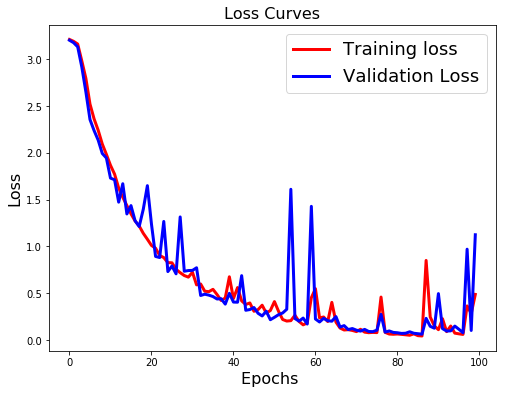

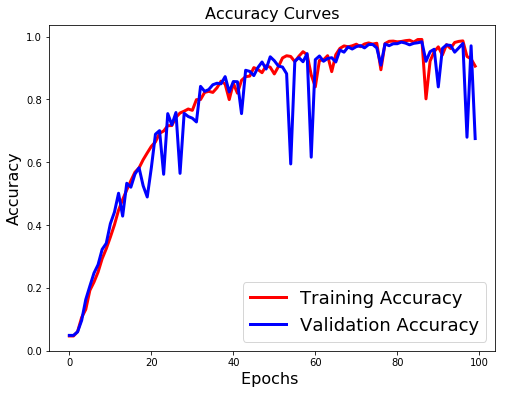

7172/7172 [==============================] - 0s 23us/step


[2.2905493044879806, 0.51547685443390967]

In [55]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Comentario:

para esta actividad, se evaluaran los siguientes pre-procesamientos:
    1. Escalando los datos de acuerdo a la intensidad máxima del pixel (dividir por 255)
    2. Escalando y centrando mediante StandarScaler()
    3. Escalando y centrando mediante RobustScaler() (Es parecida a StadarScaler() pero es mas tolerante a los outliers)
    4. Escalando los datos de acuerdo a la intensidad máxima del pixel y aplicando StandarScaler()
    5. Escalando los datos de acuerdo a la intensidad máxima del pixel y aplicando RobustScaler()
    6. Reduciendo el ruido, dandole importancia a los pixeles sobre 200 y quitandole importancia a los pixeles bajo 50

Para evaluar el desempeño de cada pre-procesamiento, se utilizo una  feed forward artificial neural network ANN y se comparo su accuracy con el conjunto de prueba, los resultados fueron los siguientes (el numero representa el pre-procesamiento):
    1. 75%
    2. 70%
    3. 68%
    4. 69%
    5. 69%
    6. 70%
  
Como podemos ver, el mejor resultado lo tubo el escalamiento de los datos de acuerdo a la intensidad máxima, por lo cual se seguira usando este modelo en las siguientes actividades.

Los demas pre-procesamiento a pesar de ser peores, se destaca que la estandarizacion suaviza la curva de loss function y de accuracy y al intentar disminuir el ruido generado en las fotos (pre-procesamiento 6), se encuentra un pick al ocupar el set de validación.  

(c) Diseñe, entrene y evalúe una red neuronal para el problema partir de la representación original de las
imágenes. Experimente con distintas arquitecturas, pre-procesamientos y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeño, decida qué modelo, de entre todos los evaluados, medirá finalmente en el conjunto de test. Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a 0.2.

In [56]:
#Funcion que construye la red neuronal
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='softmax'))
    
    return model

In [57]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)
X_train = x_tr.as_matrix().reshape(x_tr.shape[0], 28, 28, 1)
X_val = x_v.as_matrix().reshape(x_v.shape[0], 28, 28, 1)
X_test = x_t.as_matrix().reshape(x_t.shape[0], 28, 28, 1)
#CNN
model_CNN = createModel()
model_CNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_CNN.fit(X_train, to_categorical(y_tr),batch_size=128,epochs=5 , verbose=1,validation_data=(X_val,to_categorical(y_v)))

Train on 20591 samples, validate on 6864 samples
Epoch 1/5
20591/20591 [==============================] - 57s 3ms/step - loss: 3.0559 - acc: 0.0822 - val_loss: 2.6696 - val_acc: 0.1563
Epoch 2/5
20591/20591 [==============================] - 55s 3ms/step - loss: 1.9383 - acc: 0.3556 - val_loss: 0.9182 - val_acc: 0.7073
Epoch 3/5
20591/20591 [==============================] - 53s 3ms/step - loss: 0.9721 - acc: 0.6606 - val_loss: 0.4424 - val_acc: 0.8556
Epoch 4/5
20591/20591 [==============================] - 55s 3ms/step - loss: 0.5356 - acc: 0.8082 - val_loss: 0.1188 - val_acc: 0.9690
Epoch 5/5
20591/20591 [==============================] - 54s 3ms/step - loss: 0.3129 - acc: 0.8928 - val_loss: 0.0549 - val_acc: 0.9872


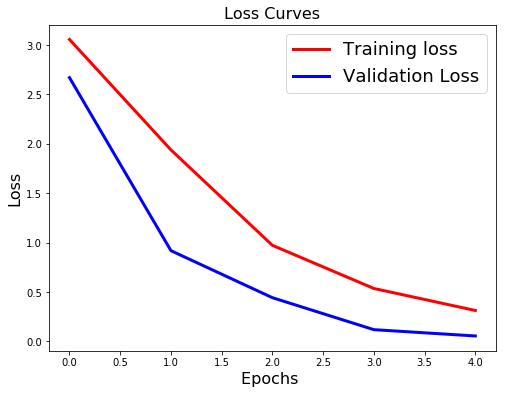

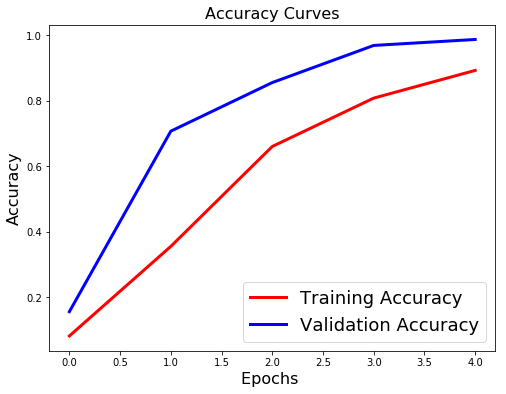

7172/7172 [==============================] - 4s 542us/step


[0.21673973503055616, 0.93516452872281097]

In [58]:

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model_CNN.evaluate(X_test,to_categorical(y_t))

In [59]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))
model.evaluate(x_t.values,to_categorical(y_t))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 1s 51us/step - loss: 3.2116 - acc: 0.0444 - val_loss: 3.2041 - val_acc: 0.0420
Epoch 2/100
20591/20591 [==============================] - 0s 21us/step - loss: 3.1955 - acc: 0.0448 - val_loss: 3.1842 - val_acc: 0.0411
Epoch 3/100
20591/20591 [==============================] - 0s 22us/step - loss: 3.1782 - acc: 0.0477 - val_loss: 3.1738 - val_acc: 0.0473
Epoch 4/100
20591/20591 [==============================] - 0s 21us/step - loss: 3.1674 - acc: 0.0564 - val_loss: 3.1576 - val_acc: 0.0542
Epoch 5/100
20591/20591 [==============================] - 0s 21us/step - loss: 3.1113 - acc: 0.0951 - val_loss: 3.0047 - val_acc: 0.0953
Epoch 6/100
20591/20591 [==============================] - 0s 21us/step - loss: 2.9055 - acc: 0.1096 - val_loss: 2.9449 - val_acc: 0.0911
Epoch 7/100
20591/20591 [==============================] - 0s 20us/step - loss: 2.7761 - acc: 0.1361 - val_loss: 2.6580 - v

20591/20591 [==============================] - 0s 21us/step - loss: 0.5087 - acc: 0.8489 - val_loss: 0.3194 - val_acc: 0.8888
Epoch 60/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.3253 - acc: 0.8976 - val_loss: 0.2220 - val_acc: 0.9260
Epoch 61/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.6344 - acc: 0.8309 - val_loss: 1.2400 - val_acc: 0.5587
Epoch 62/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.6191 - acc: 0.8001 - val_loss: 0.2644 - val_acc: 0.9327
Epoch 63/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.4126 - acc: 0.8712 - val_loss: 0.2396 - val_acc: 0.9400
Epoch 64/100
20591/20591 [==============================] - 0s 20us/step - loss: 0.2975 - acc: 0.9111 - val_loss: 2.2609 - val_acc: 0.5275
Epoch 65/100
20591/20591 [==============================] - 0s 21us/step - loss: 0.3431 - acc: 0.9002 - val_loss: 0.2016 - val_acc: 0.9515
Epoch 66/100
20591/20591 [==============

[1.2419238945690534, 0.70747350808700504]

In [60]:
model.evaluate(x_t.values,to_categorical(y_t))

7172/7172 [==============================] - 0s 24us/step


[1.2419238945690534, 0.70747350808700504]

In [61]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

#modelo en forma de "tubo", se ira reduciendo las neuronas a la mitad en cada capa
model = Sequential()
model.add(Dense(2500, input_dim=x_tr.shape[1], init='uniform', activation='tanh'))
model.add(Dense(1425, init='uniform', activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(794, init='uniform', activation='tanh'))
model.add(Dense(392, init='uniform', activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(196, init='uniform', activation='tanh'))
model.add(Dense(98, init='uniform', activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(49, activation='tanh'))
model.add(Dense(25, activation='tanh'))

model.add(Dense(25, init='uniform', activation='softmax'))




model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_dim=784, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1425, activation="tanh", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(794, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(392, activation="tanh", kernel_initializer="uniform")`
  
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/i

Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 16s 766us/step - loss: 3.2067 - acc: 0.0437 - val_loss: 3.1899 - val_acc: 0.0405
Epoch 2/100
20591/20591 [==============================] - 16s 755us/step - loss: 3.1872 - acc: 0.0492 - val_loss: 3.1768 - val_acc: 0.0485
Epoch 3/100
20591/20591 [==============================] - 15s 742us/step - loss: 3.1708 - acc: 0.0617 - val_loss: 3.1140 - val_acc: 0.1056
Epoch 4/100
20591/20591 [==============================] - 16s 781us/step - loss: 3.0218 - acc: 0.0910 - val_loss: 2.8566 - val_acc: 0.1081
Epoch 5/100
20591/20591 [==============================] - 14s 692us/step - loss: 2.8872 - acc: 0.1036 - val_loss: 2.9693 - val_acc: 0.0962
Epoch 6/100
20591/20591 [==============================] - 15s 727us/step - loss: 2.7318 - acc: 0.1342 - val_loss: 2.5497 - val_acc: 0.1638
Epoch 7/100
20591/20591 [==============================] - 15s 737us/step - loss: 2.5297 - acc: 0.1858 - val_lo

20591/20591 [==============================] - 25s 1ms/step - loss: 0.2911 - acc: 0.9185 - val_loss: 0.0641 - val_acc: 0.9869
Epoch 60/100
20591/20591 [==============================] - 19s 933us/step - loss: 0.1367 - acc: 0.9643 - val_loss: 0.0559 - val_acc: 0.9902
Epoch 61/100
20591/20591 [==============================] - 16s 793us/step - loss: 0.1377 - acc: 0.9659 - val_loss: 0.0568 - val_acc: 0.9866
Epoch 62/100
20591/20591 [==============================] - 16s 797us/step - loss: 0.1082 - acc: 0.9737 - val_loss: 0.0298 - val_acc: 0.9964
Epoch 63/100
20591/20591 [==============================] - 21s 1ms/step - loss: 0.0748 - acc: 0.9838 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 64/100
20591/20591 [==============================] - 23s 1ms/step - loss: 0.2456 - acc: 0.9386 - val_loss: 0.8008 - val_acc: 0.7828
Epoch 65/100
20591/20591 [==============================] - 23s 1ms/step - loss: 0.1388 - acc: 0.9635 - val_loss: 0.0270 - val_acc: 0.9969
Epoch 66/100
20591/20591 [========

In [62]:
model.evaluate(x_t.values,to_categorical(y_t))

7172/7172 [==============================] - 3s 447us/step


[0.94149700998927521, 0.81609035136642494]

# Comentario:

Se realizaron los siguientes experimentos en base al codigo original:

1) Cambiar solamente la funcion  de activación, provando tanto sigmoid como tanh. El resultado fue empeorar el accuracy del validation sample al rededor de un 50%.

2) Se vario tanto la cantidad de valores a ocupar en cada iteración para el entrenamiento y la cantidad de veces que se entrena la red. El resultado fue empeorar la función hasta un 20% de accuracy.

3) Se agregaron mas capas repitiendo las ultimas 2 capas del codigo base. Se aumento ligeramente el accuracy cada vez que se agregaban mas capas.

4) Despues de investigar un poco, encontramos que para el caso de imagenes centradas, una buena aproximación es pensar la red como un cono, en el cual se reduce la cantidad de neuronas por capa a la mitad de la anterior. Usando esto de información y con los resultados de la prueba N°3, decidimos aumentar el numero de capas y decrecer el numero de neuronas partiendo en 2500. Se incremento el accuracy hasta un 74%, mejorando el resultado base.

5) Finalmente, se agregaron capas de Dropout para intentar evitar el overfitting en la red entrenada, se eligio un valor del 0.5 solamente leyendo la documentación de keras. Se logro mejorar el accuracy hasta un 81%, cumpliendo con los valores requeridos.

Finalmente queremos destacar que se implemento una convolutional neural network la cual esta diseñada para el procesamiento de imagenes, para utilizarla re ajustamos los pixeles a una imagen de 28x28 y con capas muy basicas de una CNN se logro obtener un resultado del 95% de accuracy. Por otro lado, la CNN tiene un gran overfitting al observar los graficos generados al entrenar la red. Para solucionar este problema, seria interesante aplicar Data Augmentation, generando imagenes no centradas o invertidas.

(d) Para la mejor red entrenada anteriormente construya la matriz de confusión de las distintas clases, para
asi visualizar cuáles son las clases más difíciles de clasificar y con cuáles se confunden. Comente.

In [63]:
yhat_test = model.predict_classes(x_t)

In [64]:
target_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
print(classification_report(y_t,yhat_test,target_names = target_names))
print(confusion_matrix(y_t,yhat_test))

             precision    recall  f1-score   support

          a       0.92      1.00      0.96       331
          b       0.99      0.95      0.97       432
          c       0.87      1.00      0.93       310
          d       0.89      0.98      0.93       245
          e       0.86      1.00      0.93       498
          f       0.92      0.90      0.91       247
          g       0.93      0.77      0.84       348
          h       0.95      0.95      0.95       436
          i       0.85      0.74      0.79       288
          k       0.74      0.45      0.56       331
          l       0.84      0.97      0.90       209
          m       0.77      0.74      0.75       394
          n       0.80      0.64      0.71       291
          o       0.98      0.80      0.88       246
          p       0.92      0.99      0.95       347
          q       0.62      0.87      0.73       164
          r       0.58      0.72      0.64       144
          s       0.53      0.49      0.51   

Confusion matrix, without normalization
Normalized confusion matrix


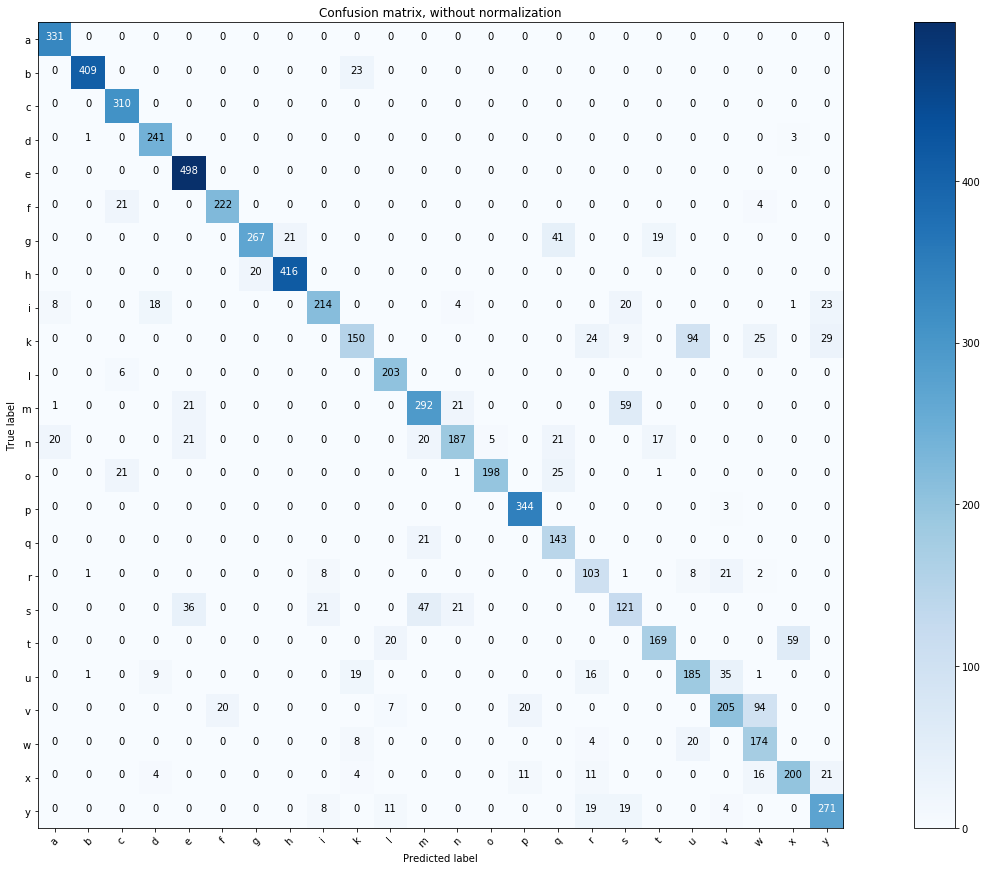

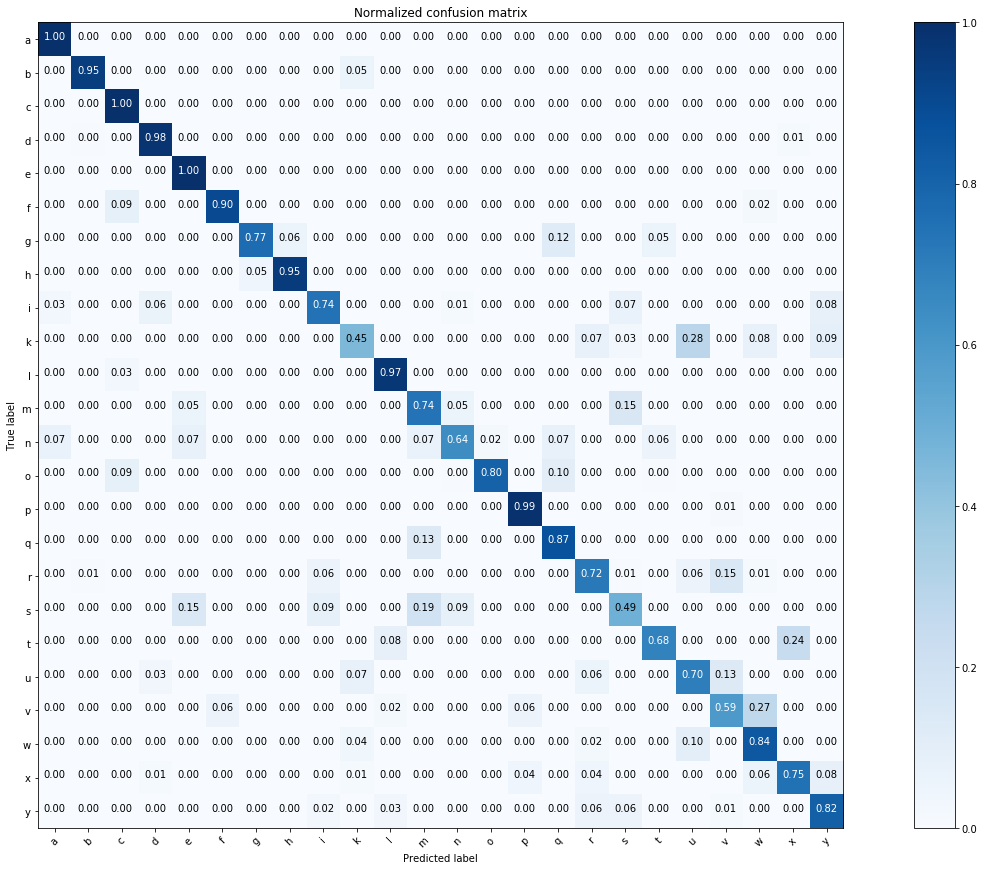

In [65]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    plt.figure(figsize=(20,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_t,yhat_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

(e) Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de
validación para seleccionar hiper-parámetros, como el nivel de regularización aplicado y/o la función
de kernel a utilizar.

In [66]:
def SVM_tarea3(kernel,x_tr, x_v, x_t, y_tr, y_v , y_t): 
    error_train = []
    error_test = []
    error_val = []
    
    pasos = [1,2,3,4,5,6,7]
    Cs = [0.0001,0.01,0.1,1,10,100,1000]
    for i,param in enumerate((0.0001,0.01,0.1,1,10,100,1000)):            
        model = SVM()
        model.set_params(C=param,kernel=kernel)
        model.fit(x_tr,y_tr)          
        
        yhat_train = model.predict(x_tr)
        yhat_test = model.predict(x_t)
        yhat_val = model.predict(x_v)
        
        
        error_train.append(1-accuracy_score(y_tr, yhat_train))
        error_test.append(1-accuracy_score(y_t, yhat_test))
        error_val.append(1-accuracy_score(y_v, yhat_val))


    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    plot.plot(pasos, error_train, label='Error de Entrenamiento ')
    plot.plot(pasos, error_test, label='Error de Prueba')
    plot.plot(pasos, error_val, label='Error de Validación ')
    plt.legend()
    if(modelo == 2):
        plt.title('SVM con kernel '+kernel)
    plt.xlabel('Valor del Parametro C')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(pasos, Cs)
    plt.tight_layout()
    plt.show()

In [67]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

# Con datos pre-procesados
model= SVM()
model.set_params(kernel='rbf')
model.fit(x_t,y_t)
yhat_SVM_train = model.predict(x_tr)
yhat_SVM_validation = model.predict(x_v)
yhat_SVM_test = model.predict(x_t)

print("Miss Classification Error Train SVM: %f"%(1-accuracy_score(y_tr, yhat_SVM_train)))
print("Miss Classification Error Validation SVM: %f"%(1-accuracy_score(y_v, yhat_SVM_validation)))
print("Miss Classification Error Test SVM: %f"%(1-accuracy_score(y_t, yhat_SVM_test)))

Miss Classification Error Train SVM: 0.550823
Miss Classification Error Validation SVM: 0.570804
Miss Classification Error Test SVM: 0.202454


In [68]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

#datos sin pre-procesar
model= SVM()
model.set_params(kernel='rbf')
model.fit(x_t,y_t)
yhat_SVM_train = model.predict(x_tr)
yhat_SVM_validation = model.predict(x_v)
yhat_SVM_test = model.predict(x_t)

print("Miss Classification Error Train SVM: %f"%(1-accuracy_score(y_tr, yhat_SVM_train)))
print("Miss Classification Error Validation SVM: %f"%(1-accuracy_score(y_v, yhat_SVM_validation)))
print("Miss Classification Error Test SVM: %f"%(1-accuracy_score(y_t, yhat_SVM_test)))

Miss Classification Error Train SVM: 0.965228
Miss Classification Error Validation SVM: 0.964889
Miss Classification Error Test SVM: 0.000000


In [69]:
#SVM_tarea3('rbf',x_tr_sinp, x_v_sinp, x_t_sinp, y_tr_sinp, y_v_sinp , y_t_sinp)
#SVM_tarea3('poly',x_tr_sinp, x_v_sinp, x_t_sinp, y_tr_sinp, y_v_sinp , y_t_sinp)
#SVM_tarea3('sigmoid',x_tr_sinp, x_v_sinp, x_t_sinp, y_tr_sinp, y_v_sinp , y_t_sinp)

(f) Entrene una árbol de clasificación sobre los pixeles con y sin pre-procesamiento. Puede utilizar el
conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.

In [70]:
def TREE_tarea3(minimo, maximo,criterio,x_tr, x_v, x_t, y_tr, y_v , y_t):
    profundidad = range(minimo,maximo)
    error_train= []
    error_test = []
    error_val = []
    
    
    for c in profundidad:
        model= Tree()
        model.set_params(max_depth=c,criterion=criterio,splitter='best')
        model.fit(x_tr,y_tr)
        yhat_train = model.predict(x_tr)
        yhat_test = model.predict(x_t)
        yhat_val = model.predict(x_v)
        error_train.append(1-accuracy_score(y_tr, yhat_train))
        error_test.append(1-accuracy_score(y_t, yhat_test))
        error_val.append(1-accuracy_score(y_v, yhat_val))
        
        
        
    plt.figure(figsize=(15,10))
    plot = plt.subplot(1,1,1)
    plot.plot(profundidad, error_train, label='Error de Entrenamiento')
    plot.plot(profundidad, error_test, label='Error de Prueba')
    plot.plot(profundidad, error_val, label='Error de Validación ')
    plt.legend()
    plt.xlabel('Profundidad del Árbol')
    plt.ylabel('Error de Clasificación')
    plt.title('Árbol de Desición con criterio ' + criterio)
    plt.axis([minimo,maximo,0.0, 1])

    plt.show()

In [71]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

#con Datos pre-procesados
model= Tree()
model.set_params(max_depth=5,criterion='gini',splitter='best')
model.fit(x_t,y_t)
yhat_TREE_train = model.predict(x_tr)
yhat_TREE_validation = model.predict(x_v)
yhat_TREE_test = model.predict(x_t)

print("Miss Classification Error Train TREE: %f"%(1-accuracy_score(y_tr, yhat_TREE_train)))
print("Miss Classification Error Validation TREE: %f"%(1-accuracy_score(y_v, yhat_TREE_validation)))
print("Miss Classification Error Test TREE: %f"%(1-accuracy_score(y_t, yhat_TREE_test)))

Miss Classification Error Train TREE: 0.800447
Miss Classification Error Validation TREE: 0.806235
Miss Classification Error Test TREE: 0.616564


In [72]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

#Datos sin pre-procesados
model= Tree()
model.set_params(max_depth=5,criterion='gini',splitter='best')
model.fit(x_t,y_t)
yhat_TREE_train = model.predict(x_tr)
yhat_TREE_validation = model.predict(x_v)
yhat_TREE_test = model.predict(x_t)

print("Miss Classification Error Train TREE: %f"%(1-accuracy_score(y_tr, yhat_TREE_train)))
print("Miss Classification Error Validation TREE: %f"%(1-accuracy_score(y_v, yhat_TREE_validation)))
print("Miss Classification Error Test TREE: %f"%(1-accuracy_score(y_t, yhat_TREE_test)))

Miss Classification Error Train TREE: 0.800204
Miss Classification Error Validation TREE: 0.805798
Miss Classification Error Test TREE: 0.616564


In [73]:
#TREE_tarea3(1,30,'gini',x_tr_sinp, x_v_sinp, x_t_sinp, y_tr_sinp, y_v_sinp , y_t_sinp)
#TREE_tarea3(1,30,'entropy',x_tr_sinp, x_v_sinp, x_t_sinp, y_tr_sinp, y_v_sinp , y_t_sinp)